In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")

In [3]:
# Correct Trophic_ID column name
df_field.rename(columns={"Trophic_ID ": "Trophic_ID"}, inplace=True)
df_field["Trophic_ID"].value_counts().shape

(24,)

In [4]:
pd.set_option('max_rows', 15)
df_field

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0
1,2,A,1,A1,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,3.06,0.44,3.50,1916.67,173.57,18.86,5.0
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0
3,4,A,2,A2,Mesofauna,Acarina,Bdellidae,Predatory mite (attacking arthropods),62,62015,3,2.58,0.92,3.50,2416.67,167.86,17.60,5.0
4,5,A,2,A2,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,2.88,0.36,3.24,2416.67,167.86,17.60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,B,2,B2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.89,8.89,2166.67,165.00,16.75,5.2
584,585,B,3,B3,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.12,9.12,2333.33,145.71,16.89,5.3
585,586,C,1,C1,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.05,9.05,3083.33,234.29,32.52,5.1
586,587,C,2,C2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.98,8.98,3333.33,193.57,32.10,4.9


In [5]:
# Create a pandas df from csv
df_matrix = pd.read_csv("data/matrice Marko-4_Martin.csv", header=0, index_col=0, sep=";")
#df.drop(df.columns[-1:], axis=1, inplace=True)
pd.set_option("max_columns", None)
df_matrix

,11 Plant-feeding nematode,31 Bacterivore nematode,45 Substrate-ingesting earthworm,23 Fungivore insect,24 Fungivore enchytraeid,21 Fungivore nematode,81 Omnivore nematode,13 Plant-feeding insect (springtail),44 Substrate-inhabiting enchytraeid,51 Predating nematode (consuming nematodes),72 Generalist mite,34 Bacterivore enchytraeid,82 Omnivore mite,12 Macrophytophage and panphytophage mite,36 Bacterivore amoebae,37 Bacterivore flagellates,#0 Plant autotrophs (roots),"41 ""Passive lifestage, substrate-related nematode""",48 Primary (heterotrophic) producer bacteria,49 Primary (heterotrophic) producer fungi,22 Microphytophage mite (feeding on fungi),62 Predatory mite (attacking arthropods),52 Predatory mite (attacking nematodes),92 Predatory mite (parasitizing mites and nematodes)
CONSUMERS,,,,,,,,,,,,,,,,,,,,,,,,
11 Plant-feeding nematode,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1
31 Bacterivore nematode,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1
45 Substrate-ingesting earthworm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23 Fungivore insect,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
24 Fungivore enchytraeid,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49 Primary (heterotrophic) producer fungi,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
22 Microphytophage mite (feeding on fungi),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
62 Predatory mite (attacking arthropods),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [6]:
# Import trophic levels
trophic_levels = pd.read_csv("data/trophic_levels_1_0.csv", index_col=0, header=None, delimiter=";", names=["trophic_level"])
trophic_levels = trophic_levels.squeeze()

# Create dict from trophic level Series
troph_lev_dict = trophic_levels.to_dict()
troph_lev_dict

{'11 Plant-feeding nematode': 1,
 '31 Bacterivore nematode': 1,
 '45 Substrate-ingesting earthworm': 1,
 '23 Fungivore insect': 1,
 '24 Fungivore enchytraeid': 1,
 '21 Fungivore nematode': 1,
 '81 Omnivore nematode': 2,
 '13 Plant-feeding insect (springtail)': 1,
 '44 Substrate-inhabiting enchytraeid': 1,
 '51 Predating nematode (consuming nematodes)': 3,
 '72 Generalist mite': 3,
 '34 Bacterivore enchytraeid': 1,
 '82 Omnivore mite': 2,
 '12 Macrophytophage and panphytophage mite': 1,
 '36 Bacterivore amoebae': 1,
 '37 Bacterivore flagellates': 1,
 '#0 Plant autotrophs (roots)': 0,
 '41 "Passive lifestage, substrate-related nematode"': 1,
 '48 Primary (heterotrophic) producer bacteria': 0,
 '49 Primary (heterotrophic) producer fungi': 0,
 '22 Microphytophage mite (feeding on fungi)': 1,
 '62 Predatory mite (attacking arthropods)': 3,
 '52 Predatory mite (attacking nematodes)': 3,
 '92 Predatory mite (parasitizing mites and nematodes)': 3}

In [7]:
# Create a graph from df by reading as adjacency matrix
#G = nx.from_pandas_adjacency(df_matrix)
# don't use 1 as weights!
G = nx.from_pandas_adjacency(df_matrix, create_using=nx.DiGraph)
# G = nx.DiGraph.reverse(G_rev)
G.name = "Graph from soil food web adjacency matrix"
print(nx.info(G))

DiGraph named 'Graph from soil food web adjacency matrix' with 24 nodes and 94 edges


In [8]:
# Remove edge weights (1 - form matrix)
for n1, n2, d in G.edges(data=True):
    d.clear()

In [9]:
# G.nodes(data=True)
# G.edges(data=True)

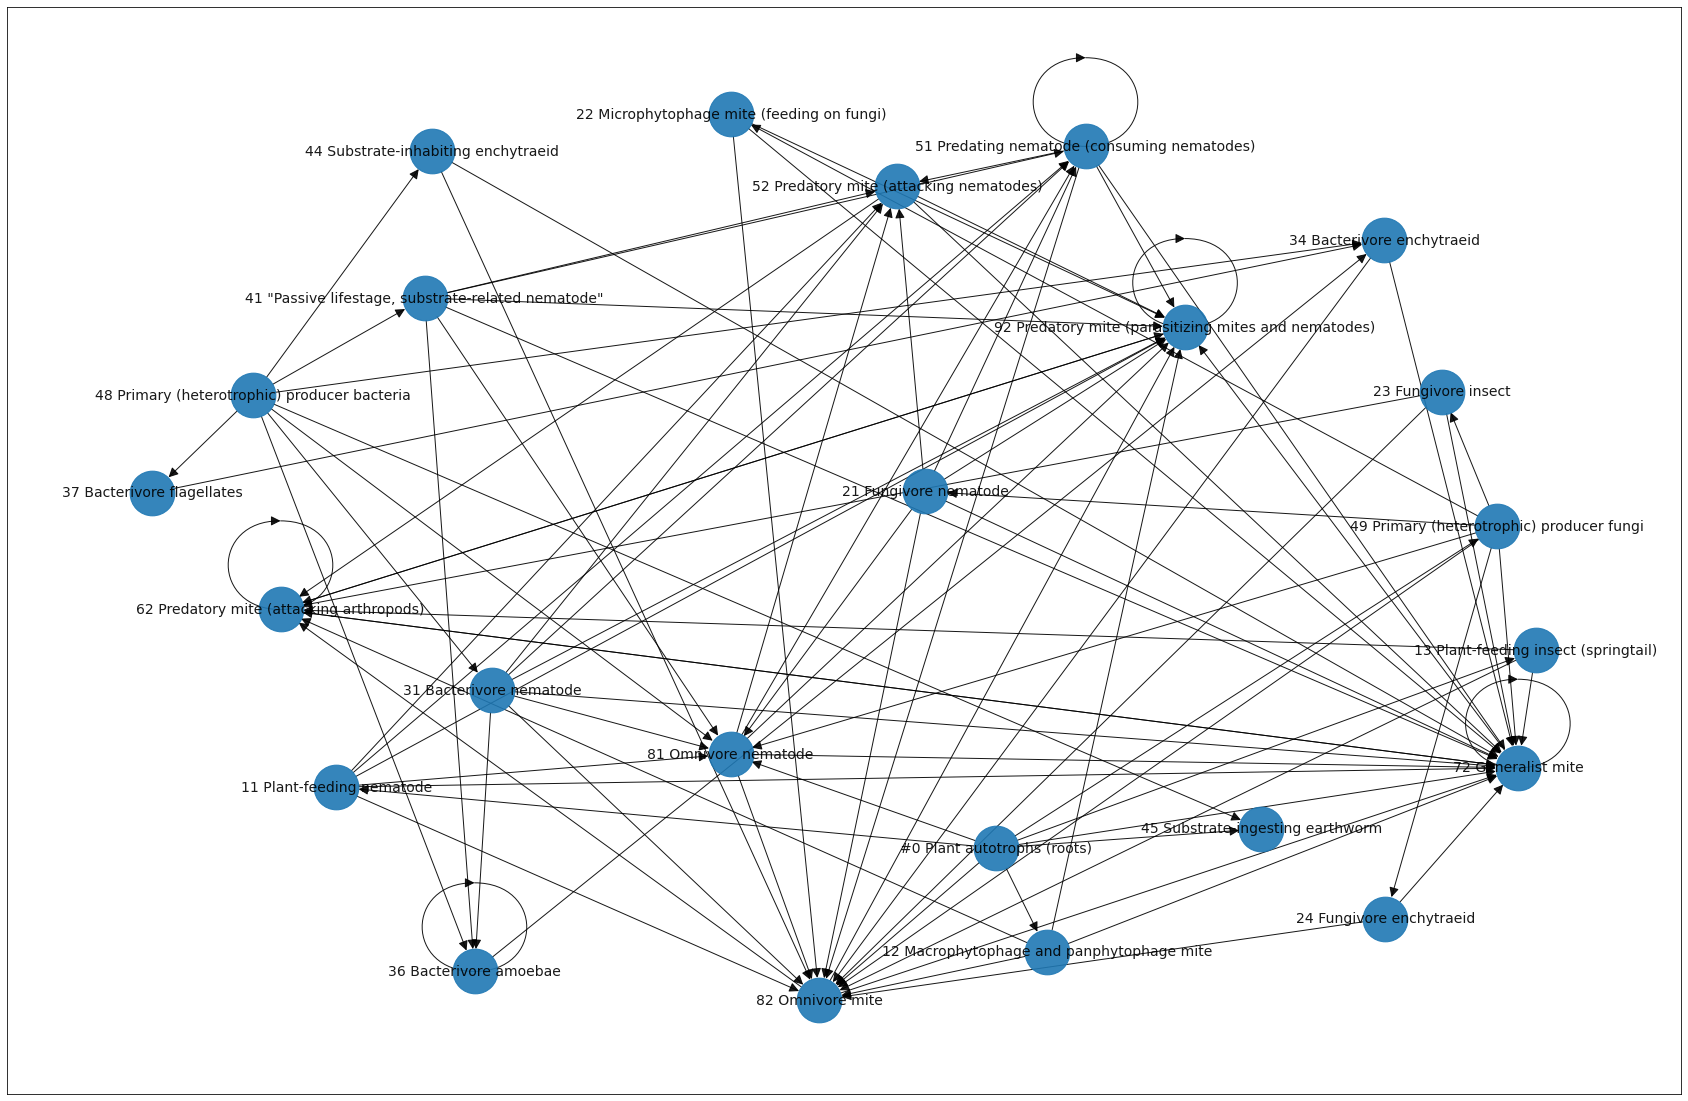

In [10]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=20, node_size=2000, alpha=0.9, font_size=14)
# f.savefig("sf_network_6")

---

## Network chracteristics

Add expalnaiton ...

In [11]:
# # nodes and edges
print(nx.info(G))

DiGraph named 'Graph from soil food web adjacency matrix' with 24 nodes and 94 edges


In [12]:
# Degree distribution (number of edges adjacent to the node)
degree = list(G.degree())
degree.sort(key=lambda x: x[1], reverse=True) 
degree

[('72 Generalist mite', 22),
 ('82 Omnivore mite', 17),
 ('92 Predatory mite (parasitizing mites and nematodes)', 15),
 ('81 Omnivore nematode', 12),
 ('51 Predating nematode (consuming nematodes)', 11),
 ('62 Predatory mite (attacking arthropods)', 11),
 ('52 Predatory mite (attacking nematodes)', 9),
 ('31 Bacterivore nematode', 8),
 ('#0 Plant autotrophs (roots)', 8),
 ('48 Primary (heterotrophic) producer bacteria', 8),
 ('49 Primary (heterotrophic) producer fungi', 8),
 ('11 Plant-feeding nematode', 7),
 ('21 Fungivore nematode', 7),
 ('41 "Passive lifestage, substrate-related nematode"', 7),
 ('36 Bacterivore amoebae', 6),
 ('34 Bacterivore enchytraeid', 5),
 ('12 Macrophytophage and panphytophage mite', 5),
 ('23 Fungivore insect', 4),
 ('13 Plant-feeding insect (springtail)', 4),
 ('22 Microphytophage mite (feeding on fungi)', 4),
 ('24 Fungivore enchytraeid', 3),
 ('44 Substrate-inhabiting enchytraeid', 3),
 ('45 Substrate-ingesting earthworm', 2),
 ('37 Bacterivore flagellate

In [13]:
# # calculate degree centrality
# dc = nx.degree_centrality(G)
# # Sort by key value
# sorted(dc.items(), key=lambda item: item[1], reverse=True)

In [14]:
# calculate out degree

# Out-degree centrality is the fraction of nodes its outgoing edges are connected to.
od = nx.out_degree_centrality(G)
sorted(od.items(), key=lambda item: item[1], reverse=True)

# Out-degree (number of edges pointing out of the node)
# od = list(G.out_degree())
# od.sort(key=lambda x: x[1], reverse=True)
# od

[('#0 Plant autotrophs (roots)', 0.34782608695652173),
 ('48 Primary (heterotrophic) producer bacteria', 0.34782608695652173),
 ('31 Bacterivore nematode', 0.30434782608695654),
 ('49 Primary (heterotrophic) producer fungi', 0.30434782608695654),
 ('11 Plant-feeding nematode', 0.2608695652173913),
 ('21 Fungivore nematode', 0.2608695652173913),
 ('41 "Passive lifestage, substrate-related nematode"', 0.2608695652173913),
 ('81 Omnivore nematode', 0.21739130434782608),
 ('51 Predating nematode (consuming nematodes)', 0.21739130434782608),
 ('12 Macrophytophage and panphytophage mite', 0.17391304347826086),
 ('23 Fungivore insect', 0.13043478260869565),
 ('13 Plant-feeding insect (springtail)', 0.13043478260869565),
 ('72 Generalist mite', 0.13043478260869565),
 ('82 Omnivore mite', 0.13043478260869565),
 ('22 Microphytophage mite (feeding on fungi)', 0.13043478260869565),
 ('62 Predatory mite (attacking arthropods)', 0.13043478260869565),
 ('52 Predatory mite (attacking nematodes)', 0.13

In [15]:
# calculate in-degree centrality (fraction of nodes its incoming edges are connected to)
ind = nx.in_degree_centrality(G)
# Sort by key value
sorted(ind.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.8260869565217391),
 ('82 Omnivore mite', 0.6086956521739131),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.5652173913043478),
 ('62 Predatory mite (attacking arthropods)', 0.34782608695652173),
 ('81 Omnivore nematode', 0.30434782608695654),
 ('51 Predating nematode (consuming nematodes)', 0.2608695652173913),
 ('52 Predatory mite (attacking nematodes)', 0.2608695652173913),
 ('36 Bacterivore amoebae', 0.17391304347826086),
 ('34 Bacterivore enchytraeid', 0.13043478260869565),
 ('45 Substrate-ingesting earthworm', 0.08695652173913043),
 ('11 Plant-feeding nematode', 0.043478260869565216),
 ('31 Bacterivore nematode', 0.043478260869565216),
 ('23 Fungivore insect', 0.043478260869565216),
 ('24 Fungivore enchytraeid', 0.043478260869565216),
 ('21 Fungivore nematode', 0.043478260869565216),
 ('13 Plant-feeding insect (springtail)', 0.043478260869565216),
 ('44 Substrate-inhabiting enchytraeid', 0.043478260869565216),
 ('12 Macrophytophage and panph

In [16]:
# Betweenes Centrality (sum of the fraction of all-pairs shortest paths that pass through) 
bc = nx.betweenness_centrality(G)
# Sort by key value
sorted(bc.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.01758893280632411),
 ('34 Bacterivore enchytraeid', 0.016963109354413704),
 ('82 Omnivore mite', 0.016798418972332016),
 ('81 Omnivore nematode', 0.009123847167325427),
 ('49 Primary (heterotrophic) producer fungi', 0.007905138339920948),
 ('92 Predatory mite (parasitizing mites and nematodes)',
  0.004183135704874835),
 ('36 Bacterivore amoebae', 0.003952569169960474),
 ('52 Predatory mite (attacking nematodes)', 0.003524374176548089),
 ('31 Bacterivore nematode', 0.00339262187088274),
 ('62 Predatory mite (attacking arthropods)', 0.003293807641633728),
 ('41 "Passive lifestage, substrate-related nematode"', 0.0027667984189723317),
 ('11 Plant-feeding nematode', 0.0023715415019762843),
 ('21 Fungivore nematode', 0.0023715415019762843),
 ('44 Substrate-inhabiting enchytraeid', 0.0011528326745718048),
 ('51 Predating nematode (consuming nematodes)', 0.0009881422924901185),
 ('12 Macrophytophage and panphytophage mite', 0.0008893280632411067),
 ('23 Fungivore in

In [17]:
# Closseness Centrality meassure (reciprocal of the average shortest path distance to u over all n-1 reachable nodes)
cc = nx.closeness_centrality(G)
# Sort by key value
sorted(cc.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.8093645484949833),
 ('82 Omnivore mite', 0.6403162055335969),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.6189258312020461),
 ('62 Predatory mite (attacking arthropods)', 0.5260869565217392),
 ('81 Omnivore nematode', 0.30434782608695654),
 ('52 Predatory mite (attacking nematodes)', 0.29347826086956524),
 ('51 Predating nematode (consuming nematodes)', 0.25296442687747034),
 ('34 Bacterivore enchytraeid', 0.15527950310559005),
 ('36 Bacterivore amoebae', 0.13043478260869565),
 ('45 Substrate-ingesting earthworm', 0.08695652173913043),
 ('23 Fungivore insect', 0.05797101449275362),
 ('24 Fungivore enchytraeid', 0.05797101449275362),
 ('21 Fungivore nematode', 0.05797101449275362),
 ('22 Microphytophage mite (feeding on fungi)', 0.05797101449275362),
 ('11 Plant-feeding nematode', 0.043478260869565216),
 ('31 Bacterivore nematode', 0.043478260869565216),
 ('13 Plant-feeding insect (springtail)', 0.043478260869565216),
 ('44 Substrate-inhabiting 

In [31]:
# Complexity

# Christian
Chr_complex = G.number_of_edges() * G.number_of_nodes()
print(f"Christian Complexity: {Chr_complex}")

# Complexity (average number of links per species (Wikipedia())
from statistics import mean
def complexity(g):
    """Calculates the average number of edges (degree) per node in a graph g"""
    deg = g.degree()
    deg_ls = []
    for n, d in deg:
        deg_ls.append(d)
    
    return mean(deg_ls) 
print(f"Complexity: {complexity(G)}") 

Christian Complexity: 2256
Complexity: 7.833333333333333


In [32]:
# Connectance
connectance = G.number_of_edges() / (G.number_of_nodes())**2
print(f"Connectance: {connectance}") 

Connectance: 0.16319444444444445


In [ ]:
# # Check if graph is bipartite
# nx.is_bipartite(G)

In [ ]:
# # Get the PageRank
# pr = nx.pagerank(G)
# # Sort by key value
# sorted(pr.items(), key=lambda item: item[1], reverse=True)

-----
# Experimental data

## Prepare dataset for each plot (A,B,C) with avg biomass, mass, abundance of OTU agregated on trophic ID level

#### Plot A

In [33]:
# Create df for Plot A
df_field_a = df_field[df_field["Plot_ID"] == "A"].copy()
# Sort by OTU
df_field_a.sort_values("OTU", inplace=True)

# Add new column with removed log  
df_field_a["Biomass"] = 10**(df_field_a["Log10(Biomass)"])
df_field_a["Mass"] = 10**(df_field_a["Log10(Mass)"])
df_field_a["Abundance"] = 10**(df_field_a["Log10(Abundance)"])

# List of OTUs
OTUs = df_field_a.OTU.unique()
print(f"Number of OTUs in plot A: {len(OTUs)}")

# # Create dictionary for number of times an organism appears (nr. of replicates)
# vc = df_field_a.OTU.value_counts()
# vc = vc.to_dict()

pd.set_option("max_rows", 15)
# df_field_a.Biomass = df_field_a.Biomass
# df_field_a.Mass = df_field_a.Mass
df_field_a

Number of OTUs in plot A: 96


,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH,Biomass,Mass,Abundance
132,133,A,1,A1,Mesofauna,Enchytraeidae,Achaeta,Fungivore enchytraeid,24,24001,2,3.15,0.44,3.59,1916.67,173.57,18.86,5.0,3890.451450,2.754229,1412.537545
133,134,A,1,A1,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,3.15,0.77,3.92,1916.67,173.57,18.86,5.0,8317.637711,5.888437,1412.537545
147,148,A,3,A3,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,2.85,0.77,3.62,3083.33,171.43,16.19,4.9,4168.693835,5.888437,707.945784
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0,15488.166189,20.417379,758.577575
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0,10471.285481,13.803843,758.577575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297,A,1,A1,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,5.28,-0.66,4.62,1916.67,173.57,18.86,5.0,41686.938347,0.218776,190546.071796
329,330,A,2,A2,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,4.65,-0.66,3.99,2416.67,167.86,17.60,5.0,9772.372210,0.218776,44668.359215
368,369,A,3,A3,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,3.94,-0.66,3.28,3083.33,171.43,16.19,4.9,1905.460718,0.218776,8709.635900
18,19,A,3,A3,Mesofauna,Acarina,Tyrophagus,Microphytophage mite (feeding on fungi),22,22140,2,2.88,0.73,3.61,3083.33,171.43,16.19,4.9,4073.802778,5.370318,758.577575


In [23]:
# Calculate the aggregated biomas per Trophic_ID

# Create dictionary OTU-> Trophic_ID
OTU2trophicID = pd.Series(df_field_a.Trophic_ID.values, df_field_a.OTU.values).to_dict()

# Calcualte avg biomas by OTU group
df_group_A_bm = df_field_a.groupby(["OTU"], as_index=False).Biomass.mean()
df_group_A_bm.Biomass = df_group_A_bm.Biomass.round(2)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_bm["OTU"].iteritems():
    df_group_A_bm.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_bm = df_group_A_bm.groupby("Trophic_ID", as_index=False).Biomass.sum()
df_group_A_bm
# pd.set_option("max_rows", None)

# # Create dictionary for avg biomass feature
avg_biomass_A = pd.Series(df_group_A_bm.Biomass.values, df_group_A_bm.Trophic_ID.values).to_dict()

# Unify node names and Trophic_ID names in Biomass dict
for key_attr in list(avg_biomass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_biomass_A[key_node] = avg_biomass_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_biomass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_biomass_A.items(), key=lambda item: item[1]))

{'92 Predatory mite (parasitizing mites and nematodes)': 0,
 '52 Predatory mite (attacking nematodes)': 1230.27,
 '62 Predatory mite (attacking arthropods)': 3162.28,
 '41 "Passive lifestage, substrate-related nematode"': 11682.96,
 '13 Plant-feeding insect (springtail)': 12483.4,
 '22 Microphytophage mite (feeding on fungi)': 15405.630000000001,
 '12 Macrophytophage and panphytophage mite': 15889.73,
 '21 Fungivore nematode': 17869.440000000002,
 '82 Omnivore mite': 18770.75,
 '72 Generalist mite': 31643.86,
 '51 Predating nematode (consuming nematodes)': 43024.240000000005,
 '23 Fungivore insect': 87314.16,
 '31 Bacterivore nematode': 97189.95,
 '34 Bacterivore enchytraeid': 116602.3,
 '37 Bacterivore flagellates': 147631.77,
 '44 Substrate-inhabiting enchytraeid': 213718.46000000002,
 '81 Omnivore nematode': 301148.6,
 '36 Bacterivore amoebae': 430441.33,
 '11 Plant-feeding nematode': 479278.83999999997,
 '24 Fungivore enchytraeid': 666025.6699999999,
 '48 Primary (heterotrophic) pr

'92 Predatory mite (parasitizing mites and nematodes)' was not detected in Plot A and C and has no biomass feature.

In [24]:
# Calculate the aggregated mass per Trophic_ID

# Calcualte avg mass by OTU group
df_group_A_m = df_field_a.groupby(["OTU"], as_index=False).Mass.mean()
# df_group_A_m.Mass = df_group_A_m.Mass.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_m["OTU"].iteritems():
    df_group_A_m.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_m = df_group_A_m.groupby("Trophic_ID", as_index=False).Mass.sum()
df_group_A_m

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_mass_A = pd.Series(df_group_A_m.Mass.values, df_group_A_m.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

# Unify node names and Trophic_ID names in Mass dict
for key_attr in list(avg_mass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_mass_A[key_node] = avg_mass_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_mass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_mass_A.items(), key=lambda item: item[1]))

{'92 Predatory mite (parasitizing mites and nematodes)': 0,
 '48 Primary (heterotrophic) producer bacteria': 1.004856778050055e-07,
 '37 Bacterivore flagellates': 5.581738950174688e-06,
 '36 Bacterivore amoebae': 4.332808765847162e-05,
 '41 "Passive lifestage, substrate-related nematode"': 0.03982475480481081,
 '21 Fungivore nematode': 0.060594173232088044,
 '31 Bacterivore nematode': 0.44778320101132774,
 '51 Predating nematode (consuming nematodes)': 0.532567889263113,
 '81 Omnivore nematode': 1.6196323444430343,
 '52 Predatory mite (attacking nematodes)': 1.62181009735893,
 '11 Plant-feeding nematode': 6.031837019417812,
 '62 Predatory mite (attacking arthropods)': 8.31763771102671,
 '13 Plant-feeding insect (springtail)': 8.82985650742963,
 '82 Omnivore mite': 19.50319135008504,
 '22 Microphytophage mite (feeding on fungi)': 20.308585374564515,
 '12 Macrophytophage and panphytophage mite': 21.4219765600248,
 '34 Bacterivore enchytraeid': 33.14754099441857,
 '72 Generalist mite': 58

In [25]:
# Calculate the aggregated abundance per Trophic_ID

# Calcualte avg abundance by OTU group
df_group_A_ab = df_field_a.groupby(["OTU"], as_index=False).Abundance.mean()
# df_group_A_m.Abundance = df_group_A_m.Abundance.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_ab["OTU"].iteritems():
    df_group_A_ab.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_ab = df_group_A_ab.groupby("Trophic_ID", as_index=False).Abundance.sum()
df_group_A_ab

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_abund_A = pd.Series(df_group_A_ab.Abundance.values, df_group_A_ab.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

# Unify node names and Trophic_ID names in Abundance dict
for key_attr in list(avg_abund_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_abund_A[key_node] = avg_abund_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually [CHECK for other plots!]
avg_abund_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_abund_A.items(), key=lambda item: item[1]))

{'92 Predatory mite (parasitizing mites and nematodes)': 0,
 '#0 Plant autotrophs (roots)': 1.0,
 '49 Primary (heterotrophic) producer fungi': 1.0,
 '45 Substrate-ingesting earthworm': 173.5702447926805,
 '62 Predatory mite (attacking arthropods)': 380.1893963205613,
 '52 Predatory mite (attacking nematodes)': 758.5775750291835,
 '72 Generalist mite': 1138.7669713497448,
 '12 Macrophytophage and panphytophage mite': 2086.5386357332395,
 '22 Microphytophage mite (feeding on fungi)': 3034.310300116734,
 '13 Plant-feeding insect (springtail)': 5310.792677093564,
 '44 Substrate-inhabiting enchytraeid': 6365.4950819679325,
 '34 Bacterivore enchytraeid': 8643.648459550895,
 '23 Fungivore insect': 8701.836333857438,
 '24 Fungivore enchytraeid': 13310.658374003238,
 '82 Omnivore mite': 13816.088850122196,
 '51 Predating nematode (consuming nematodes)': 230263.53051196696,
 '41 "Passive lifestage, substrate-related nematode"': 283337.1119769788,
 '81 Omnivore nematode': 773069.3288475692,
 '21 

In [26]:
# Add trophic level as attribute
nx.set_node_attributes(G, troph_lev_dict, "trophic_level")
# Add biomas as attribute
nx.set_node_attributes(G, avg_biomass_A, "Biomass")
# Add mass as attribute
nx.set_node_attributes(G, avg_mass_A, "Mass")
# Add abundance as attribute
nx.set_node_attributes(G, avg_abund_A, "Abundance")
G.nodes(data=True)

NodeDataView({'11 Plant-feeding nematode': {'trophic_level': 1, 'Biomass': 479278.83999999997, 'Mass': 6.031837019417812, 'Abundance': 5676284.275202691}, '31 Bacterivore nematode': {'trophic_level': 1, 'Biomass': 97189.95, 'Mass': 0.44778320101132774, 'Abundance': 3181672.1161827142}, '45 Substrate-ingesting earthworm': {'trophic_level': 1, 'Biomass': 20876194.67, 'Mass': 656677.5800017535, 'Abundance': 173.5702447926805}, '23 Fungivore insect': {'trophic_level': 1, 'Biomass': 87314.16, 'Mass': 123.42029317311494, 'Abundance': 8701.836333857438}, '24 Fungivore enchytraeid': {'trophic_level': 1, 'Biomass': 666025.6699999999, 'Mass': 469.51500281899325, 'Abundance': 13310.658374003238}, '21 Fungivore nematode': {'trophic_level': 1, 'Biomass': 17869.440000000002, 'Mass': 0.060594173232088044, 'Abundance': 1048594.941974038}, '81 Omnivore nematode': {'trophic_level': 2, 'Biomass': 301148.6, 'Mass': 1.6196323444430343, 'Abundance': 773069.3288475692}, '13 Plant-feeding insect (springtail)'

## Calculate total biomas and abundance per trophic level 

In [27]:
# Calculate biomass per trophic level
biomass_tl0 = 0.0
biomass_tl1 = 0.0
biomass_tl2 = 0.0
biomass_tl3 = 0.0

for n in G.nodes():
    if G.nodes[n]["trophic_level"] == 0:
        biomass_tl0 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 1:
        biomass_tl1 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 2:
        biomass_tl2 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 3:
        biomass_tl3 += G.nodes[n]["Biomass"]
  
                    
print(f"Trophic level0 biomass: {biomass_tl0}\nTrophic level1 biomass: {biomass_tl1}\nTrophic level2 biomass: {biomass_tl2}, \nTrophic level3 biomass: {biomass_tl3}")
print(f"Trophic level2&3: {biomass_tl2 + biomass_tl3}")

Trophic level0 biomass: 862053479.33
Trophic level1 biomass: 23187728.31
Trophic level2 biomass: 319919.35, 
Trophic level3 biomass: 79060.65000000001
Trophic level2&3: 398980.0


In [28]:
# Dont use ratios!
# Biomass ratio between trophic levels
# make bar chart
tl_bm_ratio = (biomass_tl2 + biomass_tl3) / biomass_tl1
tl_bm_ratio

0.017206515216410177

#### Trophic level abundace rankings

In [29]:
# Rank trophic groups by abundance per trophic level
from operator import itemgetter

# trophic level 0
tl0_abund = {x: y["Abundance"] for x,y in G.nodes(data=True) if y["trophic_level"]==0}
print(f"Ranking of abundances at trophic level 0:")
sorted(tl0_abund.items(), key=itemgetter(1), reverse=True)

Ranking of abundances at trophic level 0:


[('48 Primary (heterotrophic) producer bacteria', 93732668261632.48),
 ('#0 Plant autotrophs (roots)', 1.0),
 ('49 Primary (heterotrophic) producer fungi', 1.0)]

In [30]:
# trophic level 1
tl1_abund = {x: y["Abundance"] for x,y in G.nodes(data=True) if y["trophic_level"]==1}
print(f"Ranking of abundances at trophic level 1:")
sorted(tl2_abund.items(), key=itemgetter(1), reverse=True) 

Ranking of abundances at trophic level 1:


NameError: name 'tl2_abund' is not defined

In [ ]:
# trophic level 2
tl2_abund = {x: y["Abundance"] for x,y in G.nodes(data=True) if y["trophic_level"]==2}
print(f"Ranking of abundances at trophic level 2:")
sorted(tl2_abund.items(), key=itemgetter(1), reverse=True) 

In [ ]:
tl3_abund = {x: y["Abundance"] for x,y in G.nodes(data=True) if y["trophic_level"]==3}
print(f"Ranking of abundances at trophic level 3:")
sorted(tl3_abund.items(), key=itemgetter(1), reverse=True) 

In [ ]:
# trophic level 2 and 3
tl2and3_abund = {x: y["Abundance"] for x,y in G.nodes(data=True) if y["trophic_level"]== 2 or y["trophic_level"]==3}
print(f"Ranking of abundances at trophic level 2 and 3:")
sorted(tl2and3_abund.items(), key=itemgetter(1), reverse=True) 

### Export network

In [ ]:
G.nodes

In [ ]:
# Create a pickle of the graph
nx.write_gpickle(G, "objects/graph-A_4_0", protocol=5)

## Create subgraphs based on primary producers